In [2]:
# import libraries
import nltk
import json
import re
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import csv
import numpy as np
import nltk
import seaborn as sb
import warnings

from wordcloud import STOPWORDS, WordCloud


In [4]:
# Importing the dataset
data = pd.read_excel('IFND_dataset.xlsx')

In [5]:
data.head(5)

,id,Statement,Web,Category,Date,Label
0,1,Disturbed Areas Act amendment in Gujarat gets ...,INDIANEXPRESS,POLITICS,2020-10-01,True
1,2,PM Modi to address people of Bengal on Durga P...,INDIANEXPRESS,POLITICS,2020-09-01,True
2,3,"Finally, 32 mills get Maharashtra govt guarant...",INDIANEXPRESS,POLITICS,2020-10-01,True
3,4,Vadodara: Man booked for rape after talk on ‰Û...,INDIANEXPRESS,POLITICS,2020-10-01,True
4,5,"Indian mom survives Covid-19, delivers baby in...",INDIANEXPRESS,POLITICS,2020-10-01,True


In [6]:
data.shape

(1000, 6)

# **Exploratory Data Analysis - IFND Dataset**

Text(0.5, 1.0, 'Types & Number of Classes in the dataset')

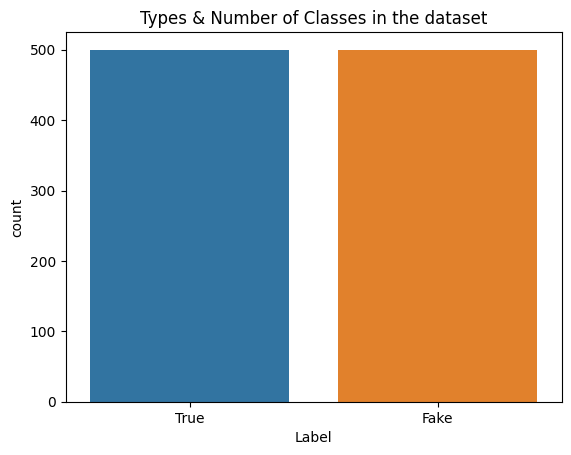

In [7]:
sns.countplot(x='Label',data=data)
plt.title('Types & Number of Classes in the dataset')

### Creating Word Clouds for the text 'statements' in the IFND dataset


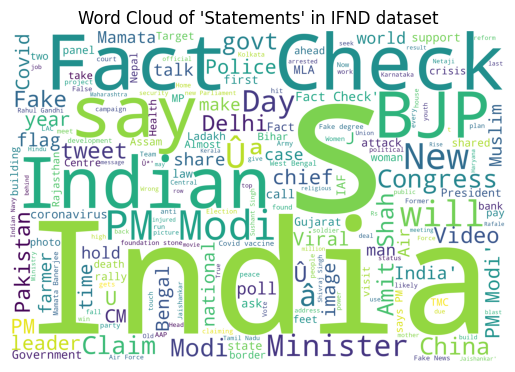

In [8]:
np.random.seed(0) # setting seed to get similar results over multiple experiments.

# word cloud for all the statements in the entire dataset
text = data['Statement'].values
wordcloud = WordCloud(width=3000, height=2000, background_color='white',stopwords=STOPWORDS).generate(str(text))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Word Cloud of 'Statements' in IFND dataset")
plt.show()

In [9]:
# creating two dataset consisting of True and Fake statements seperately
np.random.seed(0)
true_statements_dataset = data[data['Label'].astype(str) == 'True']
fake_statements_dataset = data[data['Label'].astype(str) == 'Fake']

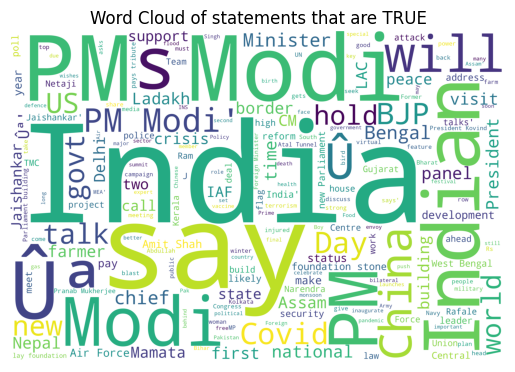

In [10]:
np.random.seed(0)
# creating word cloud for only those statements that are TRUE
text_true = true_statements_dataset['Statement'].values
wordcloud_true = WordCloud(width=3000, height=2000, background_color='white',stopwords=STOPWORDS).generate(str(text_true))
plt.imshow(wordcloud_true)
plt.axis('off')
plt.title("Word Cloud of statements that are TRUE")
plt.show()

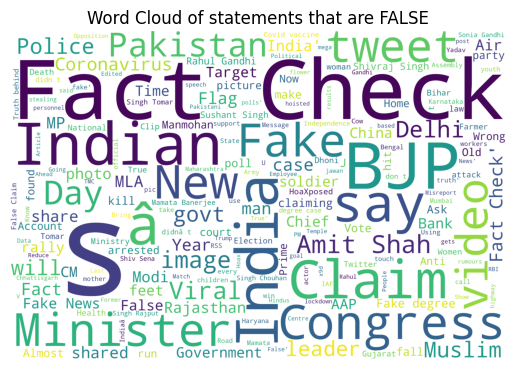

In [11]:
np.random.seed(0)
# creating word cloud for or only those statements that are FAKE
text_false = fake_statements_dataset['Statement'].values
wordcloud_false = WordCloud(width=3000, height=2000, background_color='white',stopwords=STOPWORDS).generate(str(text_false))
plt.imshow(wordcloud_false)
plt.axis('off')
plt.title("Word Cloud of statements that are FALSE")
plt.show()

####Exploring the 'web' sources

In [12]:
web_data = data.copy()
websources = web_data['Web'].unique()

print("The total number of  websources is : %d  " % len(websources))
print()
print("Some sample websources are:\n", websources[:10].tolist())

The total number of  websources is : 20  

Some sample websources are:
 ['INDIANEXPRESS', 'TRIBUNEINDIA', 'DNAINDIA', 'ENGLISHTRIBUNE', 'THESTATESMAN', 'TEEKHIMIRCHI', 'THEPRINT', 'INDIATODAY', 'NEWSMETER', 'NEWSMOBILE']


In [13]:
# limiting the websources from which frequent statements are taken in the dataset.
web_count = web_data.groupby("Web").Statement.count()
webs = web_count[web_count > 20]     # more than 20 statements

print("Number of parties or entities from which more than 20 statements are taken : %d" % len(webs))
print()
print("Some of the websources and number of statements taken from them are :\n", webs[:10])

Number of parties or entities from which more than 20 statements are taken : 12

Some of the websources and number of statements taken from them are :
 Web
ALT               27
BOOMLIVE          86
FACTCHECKER       52
FACTCRESCENDO     29
INDIANEXPRESS    150
INDIATODAY        88
NEWSMOBILE        67
ONEINDIA          33
TEEKHIMIRCHI      42
THEPRINT         150
Name: Statement, dtype: int64


In [14]:
#Limiting ourselves to only prominent websources for visualization
web_data = web_data[web_data['Web'].isin(webs.keys())]

In [15]:
"""function to groupby the websources by the class and count of taken from them"""

def class_counts(data, column):
    return data.groupby([column,"Label"]).agg({"id" : "count"})


Text(0.5, 1.0, 'Top 13 websources with count and class of statements taken')

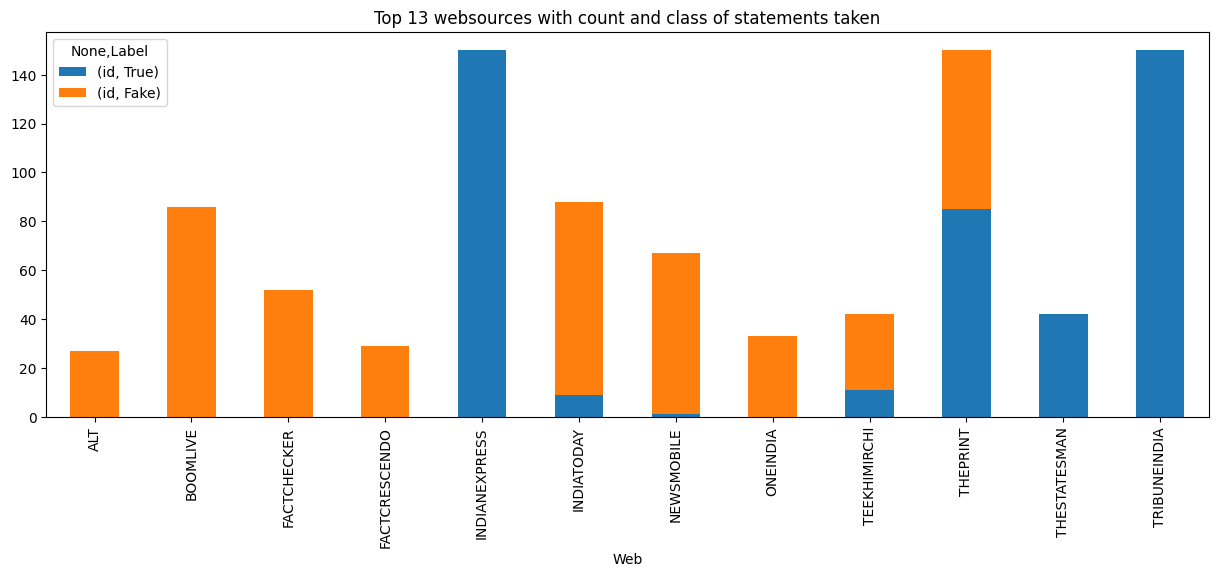

In [16]:
# stacked bar plot of speakrs with class and count of statements
breakdown = class_counts(web_data, 'Web')
breakdown.unstack().plot(kind='bar', stacked=True, figsize=(15,5))
plt.title("Top 13 websources with count and class of statements taken")

In [18]:
# Convert the 'date' column to datetime type
data['Date'] = pd.to_datetime(data['Date'])

In [19]:
# Extract the year from the 'date' column
data['year'] = data['Date'].dt.year


In [21]:
# Group the data by 'year' and 'label' and count the occurrences
grouped_data = data.groupby(['year', 'Label']).size().reset_index(name='count')

In [23]:
# Pivot the data to have 'year' as the x-axis, 'label' as the legend, and 'count' as the y-axis
pivot_data = grouped_data.pivot(index='year', columns='Label', values='count')


<Axes: xlabel='year'>

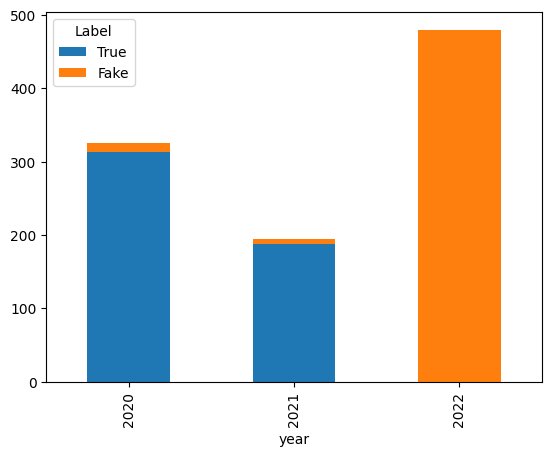

In [24]:
# Plot the graph
pivot_data.plot(kind='bar', stacked=True)